In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings


In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import optuna
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train_Mortgage.csv')
val = pd.read_csv('val_Mortgage.csv')

X_train = train.drop('Mortgage', axis=1)
y_train = train['Mortgage']
X_val = val.drop('Mortgage', axis=1)
y_val = val['Mortgage']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def objective(trial):
    params = {
        'kernel': 'rbf',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_params['kernel'] = 'rbf'
best_params['probability'] = True

final_model_mortgage_rbf = SVC(**best_params)
final_model_mortgage_rbf.fit(X_train_scaled, y_train)

y_proba = final_model_mortgage_rbf.predict_proba(X_val_scaled)[:, 1]
fpr_rbf, tpr_rbf, _ = roc_curve(y_val, y_proba)
roc_auc_rbf = roc_auc_score(y_val, y_proba)
print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_rbf:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-04-21 19:15:20,577] A new study created in memory with name: no-name-67f60453-89e0-418d-934f-70a2ce97fc0f
[I 2025-04-21 19:16:01,370] Trial 0 finished with value: 0.9394150438183516 and parameters: {'C': 0.1852428814013345, 'gamma': 0.00040673025197762464, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9394150438183516.
[I 2025-04-21 19:16:31,848] Trial 1 finished with value: 0.9347321969350805 and parameters: {'C': 0.014885271426791297, 'gamma': 1.4683630607315432e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9394150438183516.
[I 2025-04-21 19:17:00,236] Trial 2 finished with value: 0.7680493586034333 and parameters: {'C': 0.004507732914528394, 'gamma': 2.8336143500910302, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9394150438183516.
[I 2025-04-21 19:17:31,425] Trial 3 finished with value: 0.9358690819548378 and parameters: {'C': 0.5027452542714118, 'gamma': 6.047319215989505e-05, 'class_weight': 'balanced'}. Best is trial 0 with va


Optimization Results:
Best Validation AUC: 0.9393

Best Parameters:
              C: 20.043683473306963
          gamma: 0.0017373705738491694
   class_weight: None
         kernel: rbf
    probability: True


In [14]:
final_model_Mortgage_rbf = final_model_mortgage_rbf

в резудьате мы согли обцчить мроедь только для rbf. Вот их RoC кривые

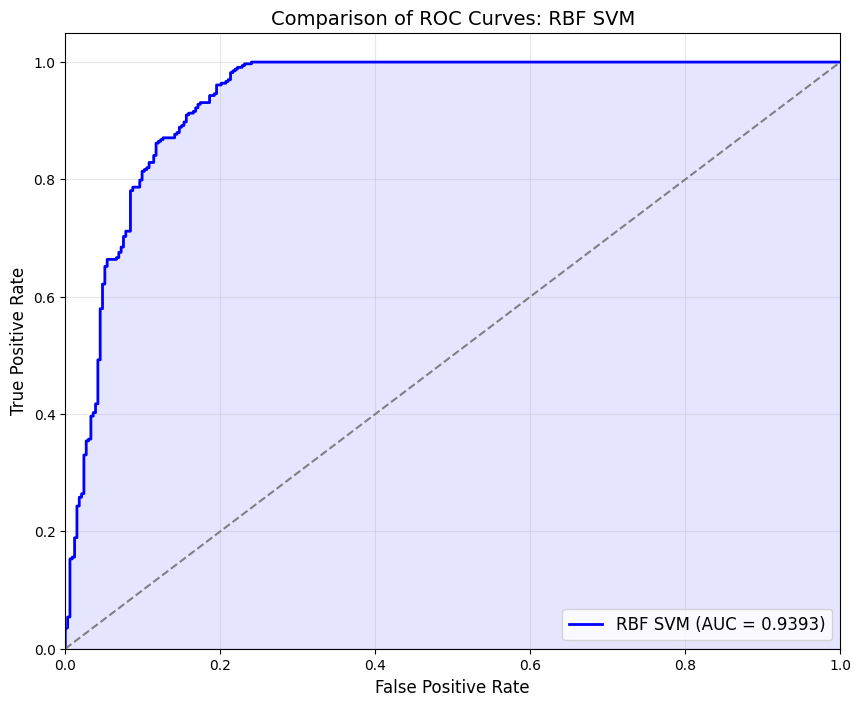

In [5]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_rbf, tpr_rbf, color='blue', lw=2,
         label=f'RBF SVM (AUC = {roc_auc_rbf:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.fill_between(fpr_rbf, tpr_rbf, alpha=0.1, color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparison of ROC Curves: RBF SVM', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

повторим предсказания для оставшихся признаков

In [6]:
train = pd.read_csv('train_Pension.csv')
val = pd.read_csv('val_Pension.csv')
train.size, val.size

(176360, 19640)

In [7]:
train = pd.read_csv('train_Pension.csv')
val = pd.read_csv('val_Pension.csv')

X_train = train.drop('Pension', axis=1)
y_train = train['Pension']
X_val = val.drop('Pension', axis=1)
y_val = val['Pension']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def objective(trial):
    params = {
        'kernel': 'rbf',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_params['kernel'] = 'rbf'
best_params['probability'] = True

final_model_pension_rbf = SVC(**best_params)
final_model_pension_rbf.fit(X_train_scaled, y_train)

y_proba = final_model_pension_rbf.predict_proba(X_val_scaled)[:, 1]
fpr_rbf, tpr_rbf, _ = roc_curve(y_val, y_proba)
roc_auc_rbf = roc_auc_score(y_val, y_proba)
print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_rbf:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-04-21 19:23:48,225] A new study created in memory with name: no-name-1604fea8-1a5b-4d22-9ba0-3e10d2b9660a
[I 2025-04-21 19:24:22,039] Trial 0 finished with value: 0.5857818991954836 and parameters: {'C': 0.31035113181018564, 'gamma': 12.711904917965693, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5857818991954836.
[I 2025-04-21 19:25:00,246] Trial 1 finished with value: 0.7033726212388034 and parameters: {'C': 60.26328334275261, 'gamma': 0.003931682252735067, 'class_weight': None}. Best is trial 1 with value: 0.7033726212388034.
[I 2025-04-21 19:25:27,971] Trial 2 finished with value: 0.7737239193112743 and parameters: {'C': 0.1288303774724209, 'gamma': 0.0007322890543093843, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.7737239193112743.
[I 2025-04-21 19:26:01,086] Trial 3 finished with value: 0.5903605901721964 and parameters: {'C': 1.105342954302828, 'gamma': 8.430621957240128, 'class_weight': None}. Best is trial 2 with value: 0.7737239193112743.


Optimization Results:
Best Validation AUC: 0.7783

Best Parameters:
              C: 0.2596527628524151
          gamma: 0.000547667237214458
   class_weight: balanced
         kernel: rbf
    probability: True


In [13]:
final_model_Pension_rbf = final_model_pension_rbf

как и с прошлым параметром оптимизация прошла только с sigmoid и rbf

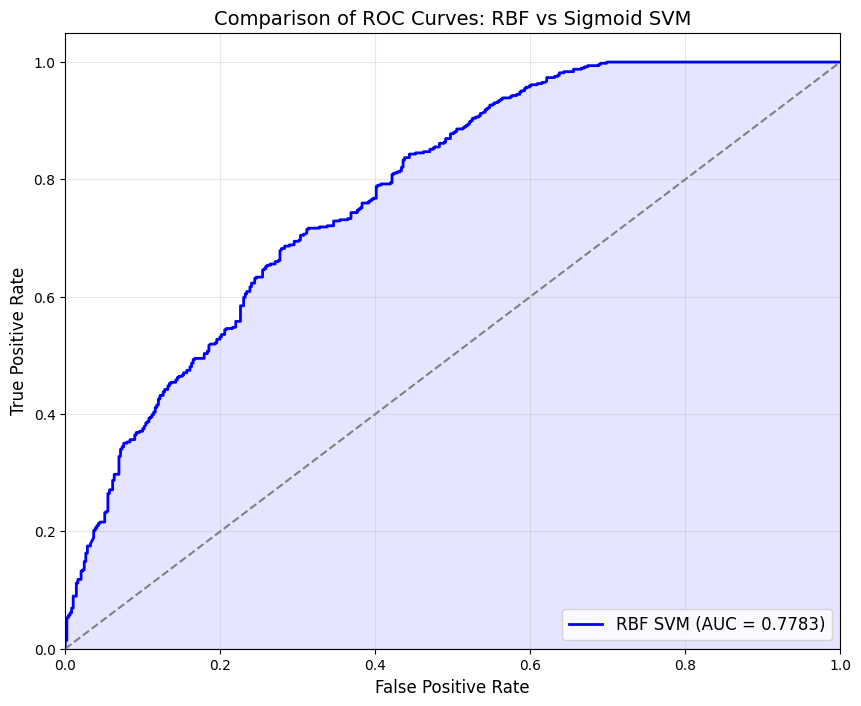

In [8]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_rbf, tpr_rbf, color='blue', lw=2,
         label=f'RBF SVM (AUC = {roc_auc_rbf:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.fill_between(fpr_rbf, tpr_rbf, alpha=0.1, color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparison of ROC Curves: RBF vs Sigmoid SVM', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

теперь построим модель для Savings

In [9]:
train = pd.read_csv('train_Savings.csv')
val = pd.read_csv('val_Savings.csv')

X_train = train.drop('Savings', axis=1)
y_train = train['Savings']
X_val = val.drop('Savings', axis=1)
y_val = val['Savings']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def objective(trial):
    params = {
        'kernel': 'rbf',
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-5, 1e2, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'probability': True,
        'cache_size': 1000
    }

    model = SVC(**params)
    scores = cross_val_score(model, X_train_scaled, y_train,
                           cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_params['kernel'] = 'rbf'
best_params['probability'] = True

final_model_Savings_rbf = SVC(**best_params)
final_model_Savings_rbf.fit(X_train_scaled, y_train)

y_proba = final_model_Savings_rbf.predict_proba(X_val_scaled)[:, 1]
fpr_rbf, tpr_rbf, _ = roc_curve(y_val, y_proba)
roc_auc_rbf = roc_auc_score(y_val, y_proba)
print("\nOptimization Results:")
print(f"Best Validation AUC: {roc_auc_rbf:.4f}")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param:>15}: {value}")

[I 2025-04-21 19:40:13,786] A new study created in memory with name: no-name-3b6a1308-0212-4c3d-a10e-9e71ff510414
[I 2025-04-21 19:40:36,122] Trial 0 finished with value: 0.6634565038265813 and parameters: {'C': 0.44030032217101756, 'gamma': 3.371160910132044e-05, 'class_weight': None}. Best is trial 0 with value: 0.6634565038265813.
[I 2025-04-21 19:41:06,076] Trial 1 finished with value: 0.5453986857990066 and parameters: {'C': 1.4307923827025326, 'gamma': 4.306601558336946, 'class_weight': None}. Best is trial 0 with value: 0.6634565038265813.
[I 2025-04-21 19:41:45,688] Trial 2 finished with value: 0.5197739752694491 and parameters: {'C': 4.333546789444268, 'gamma': 36.65447348115457, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6634565038265813.
[I 2025-04-21 19:42:12,890] Trial 3 finished with value: 0.6646324752213674 and parameters: {'C': 0.19131487507359868, 'gamma': 0.05940716201108937, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.6646324752213674.


Optimization Results:
Best Validation AUC: 0.6957

Best Parameters:
              C: 18.83673794328564
          gamma: 0.0007173265471570275
   class_weight: balanced
         kernel: rbf
    probability: True


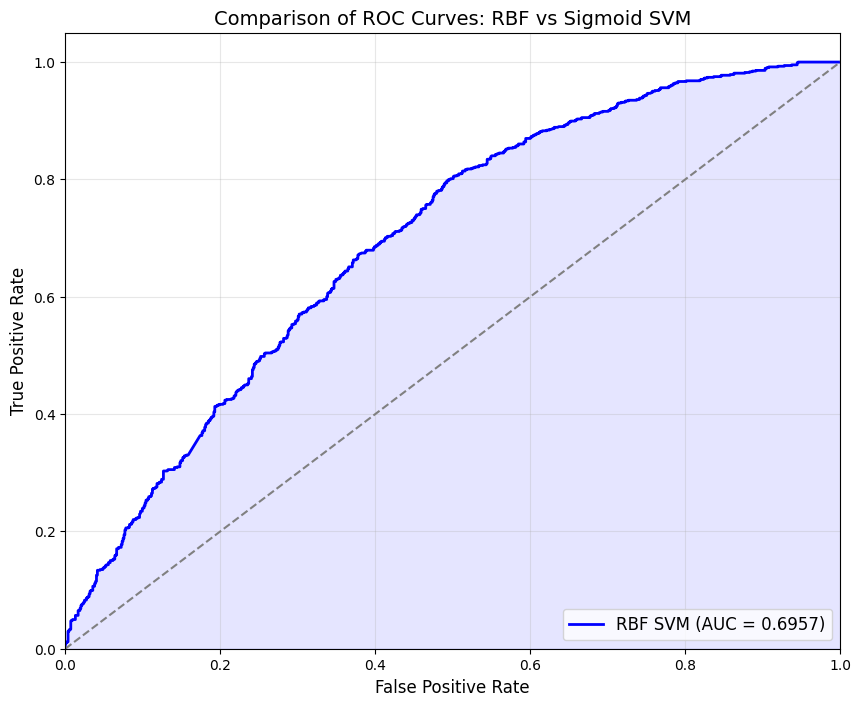

In [10]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_rbf, tpr_rbf, color='blue', lw=2,
         label=f'RBF SVM (AUC = {roc_auc_rbf:.4f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.fill_between(fpr_rbf, tpr_rbf, alpha=0.1, color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparison of ROC Curves: RBF vs Sigmoid SVM', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
<ipython-input-19-c8ecc04a92a0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=df, palette="viridis")
<ipython-input-19-c8ecc04a92a0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same ef

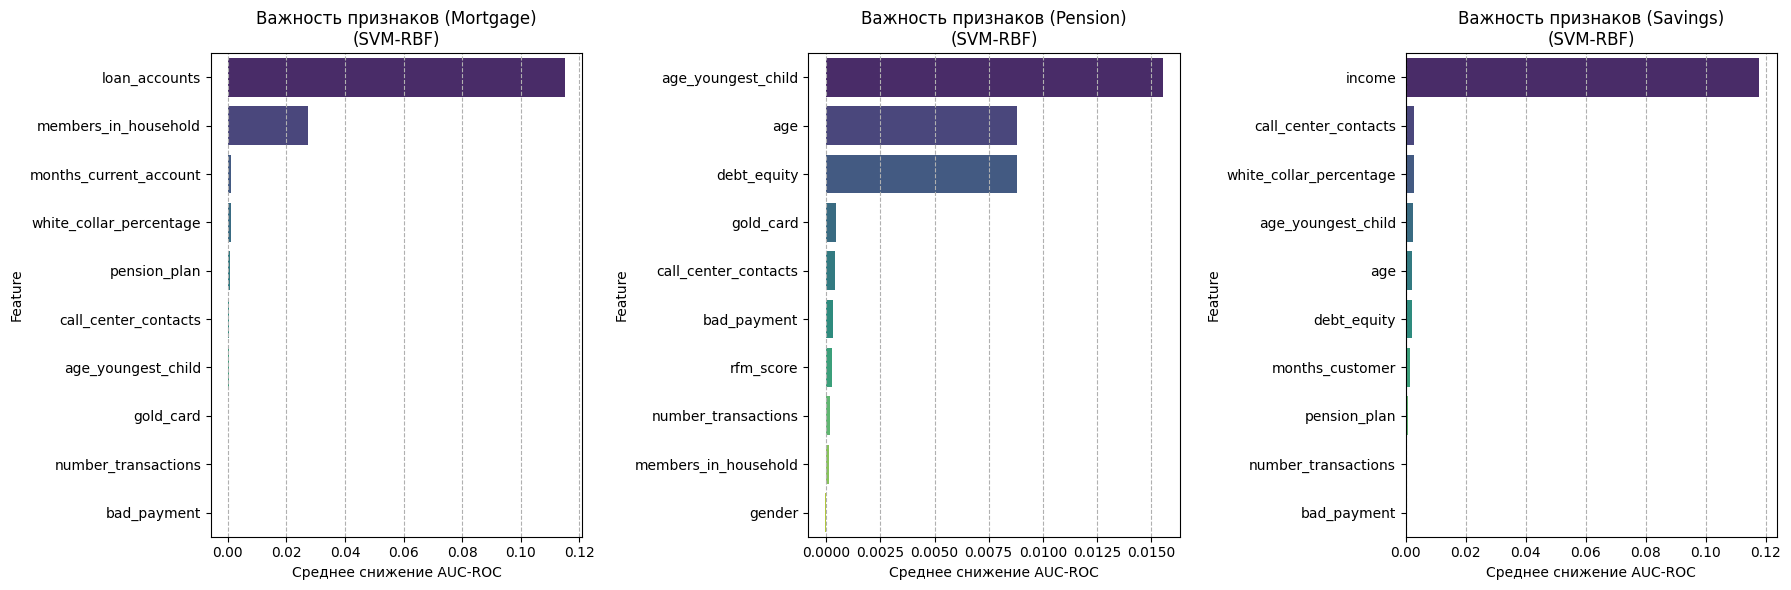

Сводная таблица стабильности:
Продукт                             Mortgage   Pension   Savings
Признак                                                         
loan_accounts                   1.152189e-01 -0.000635  0.000023
members_in_household            2.737582e-02  0.000113 -0.000431
months_current_account          1.111363e-03 -0.000272 -0.000295
white_collar_percentage         8.845543e-04 -0.000408  0.002654
pension_plan                    7.484690e-04 -0.000113  0.000590
call_center_contacts            4.762985e-04  0.000386  0.002835
age_youngest_child              4.309367e-04  0.015536  0.002404
gold_card                       1.360853e-04  0.000431  0.000340
number_transactions             4.440892e-17  0.000181  0.000567
bad_payment                    -4.536176e-05  0.000295  0.000363
rfm_score                      -6.804264e-05  0.000249 -0.000658
age                            -1.360853e-04  0.008800  0.002109
debt_equity                    -1.360853e-04  0.008800  0.00

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance


products = ["Mortgage", "Pension", "Savings"]
models = {
    "Mortgage": final_model_Mortgage_rbf,
    "Pension": final_model_Pension_rbf,
    "Savings": final_model_Savings_rbf
}

def load_features(product):
    """Загружает данные и возвращает имена признаков"""
    train = pd.read_csv(f'train_{product}.csv')
    return train.drop(product, axis=1).columns.tolist()

feature_importance = {}

for product in products:
    try:
        train = pd.read_csv(f'train_{product}.csv')
        X_train = train.drop(product, axis=1)
        feature_names = X_train.columns.tolist()

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train),
            columns=feature_names
        )

        result = permutation_importance(
            models[product],
            X_train_scaled,
            train[product],
            n_repeats=5,
            random_state=42,
            n_jobs=-1
        )

        feature_importance[product] = {
            "importances": result.importances_mean,
            "features": feature_names
        }

    except Exception as e:
        print(f"Ошибка для {product}: {str(e)}")
        continue


plt.figure(figsize=(18, 6))
for idx, product in enumerate(products, 1):
    if product not in feature_importance:
        continue

    data = feature_importance[product]
    df = pd.DataFrame({
        "Feature": data["features"],
        "Importance": data["importances"]
    }).sort_values("Importance", ascending=False).head(10)

    plt.subplot(1, 3, idx)
    sns.barplot(x="Importance", y="Feature", data=df, palette="viridis")
    plt.title(f"Важность признаков ({product})\n(SVM-RBF)")
    plt.xlabel("Среднее снижение AUC-ROC")
    plt.grid(axis="x", linestyle="--")

plt.tight_layout()
plt.show()


stability_data = []
for product in products:
    if product not in feature_importance:
        continue

    data = feature_importance[product]
    for feature, imp in zip(data["features"], data["importances"]):
        stability_data.append({
            "Признак": feature,
            "Продукт": product,
            "Важность": imp
        })

stability_df = pd.DataFrame(stability_data)
pivot_table = stability_df.pivot_table(
    index="Признак",
    columns="Продукт",
    values="Важность",
    aggfunc="mean"
).dropna(how="all")

print("Сводная таблица стабильности:")
print(pivot_table.sort_values(by="Mortgage", ascending=False))


common_features = set()
for product in products:
    if product in feature_importance:
        features = set(feature_importance[product]["features"])
        common_features = features if not common_features else common_features & features

print("\nОбщие значимые признаки для всех продуктов:", common_features)